In [195]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [196]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [127]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


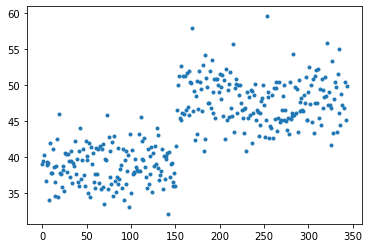

In [93]:
plt.plot(df['bill_length_mm'], '.')

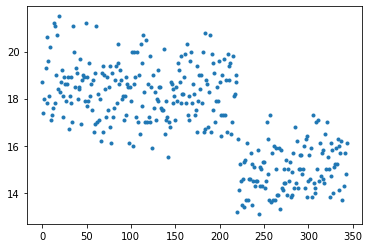

In [83]:
plt.plot(df['bill_depth_mm'], '.')

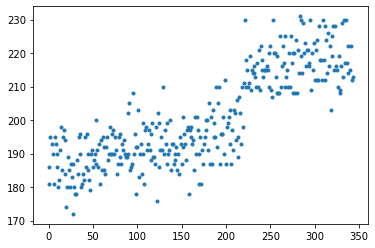

In [84]:
plt.plot(df['flipper_length_mm'], '.')

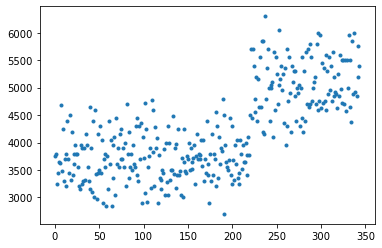

In [85]:
plt.plot(df['body_mass_g'], '.')

In [90]:
df['species'].unique(),  df['island'].unique(), df['sex'].unique()

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 array(['Male', 'Female', nan], dtype=object))

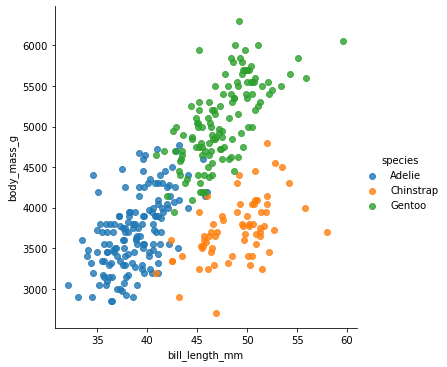

In [197]:
sns.lmplot('bill_length_mm', 'body_mass_g', data=df, hue='species', fit_reg=False)

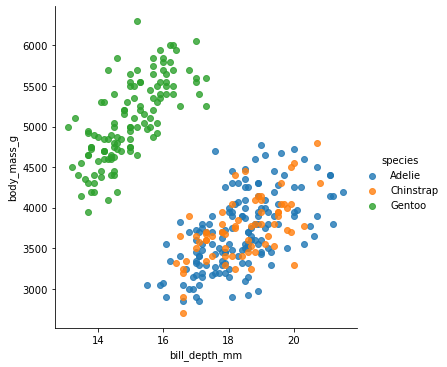

In [198]:
sns.lmplot('bill_depth_mm', 'body_mass_g', data=df, hue='species', fit_reg=False)

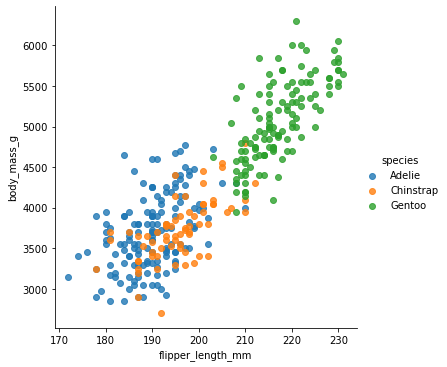

In [199]:
sns.lmplot('flipper_length_mm', 'body_mass_g', data=df, hue='species', fit_reg=False)

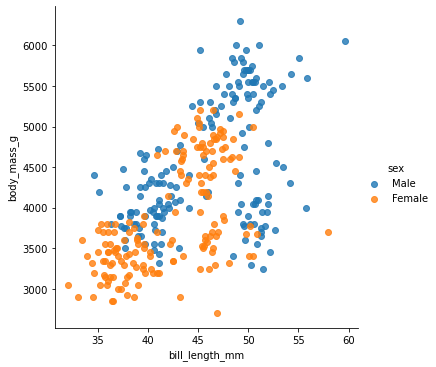

In [200]:
sns.lmplot('bill_length_mm', 'body_mass_g', data=df, hue='sex', fit_reg=False)

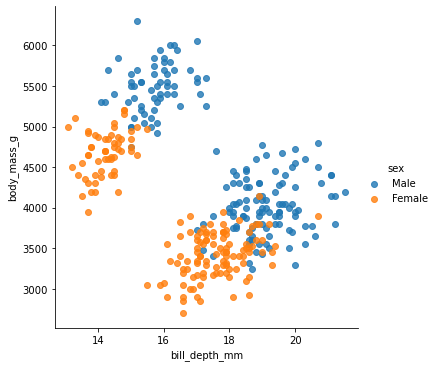

In [201]:
sns.lmplot('bill_depth_mm', 'body_mass_g', data=df, hue='sex', fit_reg=False)

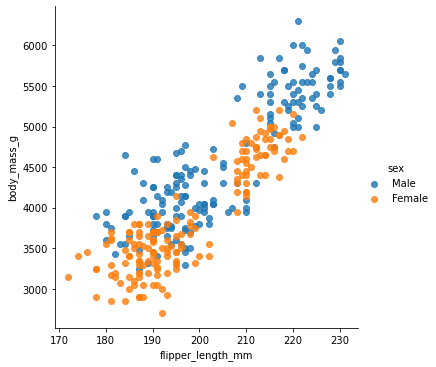

In [202]:
sns.lmplot('flipper_length_mm', 'body_mass_g', data=df, hue='sex', fit_reg=False)

In [116]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [128]:
df[df['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [129]:
df.drop([3, 339], inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [141]:
norm_df = preprocessing.MinMaxScaler().fit_transform(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
norm_df

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [142]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(norm_df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [143]:
df['label'] = kmeans.labels_
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


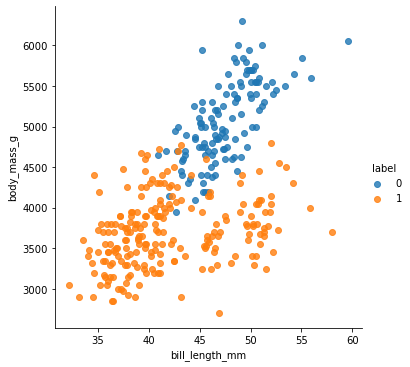

In [203]:
sns.lmplot('bill_length_mm', 'body_mass_g', data=df, hue='label', fit_reg=False)

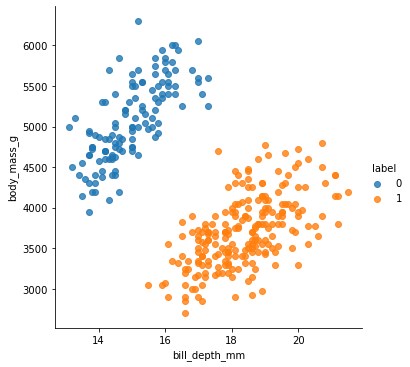

In [204]:
sns.lmplot('bill_depth_mm', 'body_mass_g', data=df, hue='label', fit_reg=False)

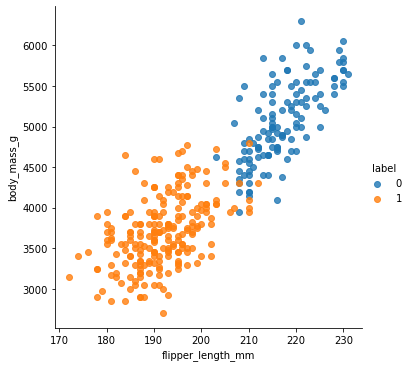

In [205]:
sns.lmplot('flipper_length_mm', 'body_mass_g', data=df, hue='label', fit_reg=False)

In [156]:
df1 = df[df['label'] == 1][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df2 = df[df['label'] == 0][['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df1, df2

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 0              39.1           18.7              181.0       3750.0
 1              39.5           17.4              186.0       3800.0
 2              40.3           18.0              195.0       3250.0
 4              36.7           19.3              193.0       3450.0
 5              39.3           20.6              190.0       3650.0
 ..              ...            ...                ...          ...
 215            55.8           19.8              207.0       4000.0
 216            43.5           18.1              202.0       3400.0
 217            49.6           18.2              193.0       3775.0
 218            50.8           19.0              210.0       4100.0
 219            50.2           18.7              198.0       3775.0
 
 [219 rows x 4 columns],
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 220            46.1           13.2              211.0       4500.0
 221            50.0 

In [157]:
df1 = df1.to_numpy()
df2 = df2.to_numpy()

In [159]:
df1.mean(axis=0), df1.std(axis=0)

(array([  41.90958904,   18.36940639,  191.77625571, 3710.73059361]),
 array([  5.46454319,   1.18719389,   7.22692724, 435.2532098 ]))

In [161]:
z1 = np.absolute(((df1 - df1.mean(axis=0)) / df1.std(axis=0)))
z1[:10]

array([[0.51414893, 0.2784664 , 1.49112553, 0.09022198],
       [0.44094977, 0.81655272, 0.79926856, 0.20509764],
       [0.29455144, 0.31115928, 0.44607399, 1.05853463],
       [0.95334392, 0.78385984, 0.1693312 , 0.59903198],
       [0.47754935, 1.87887895, 0.24578298, 0.13952934],
       [0.55074851, 0.47962376, 1.49112553, 0.19696717],
       [0.49584914, 1.03655656, 0.44607399, 2.2154217 ],
       [1.4291385 , 0.22692704, 0.1693312 , 0.54159415],
       [0.01654502, 1.54194999, 0.24578298, 1.23897859],
       [0.75204622, 1.06924943, 0.79926856, 0.94365897]])

In [164]:
(z1.sum(axis=1) / 4)[:10]

array([0.59349071, 0.56546717, 0.52757983, 0.62639174, 0.68543516,
       0.67961624, 1.04847535, 0.59174772, 0.76081414, 0.89105579])

In [172]:
z1.sum(axis=1) / 4 > 1.4

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [179]:
res1 = pd.DataFrame(df1, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
res1['high_z'] = z1.sum(axis=1) / 4 > 1.4
res1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,high_z
0,39.1,18.7,181.0,3750.0,False
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
3,36.7,19.3,193.0,3450.0,False
4,39.3,20.6,190.0,3650.0,False


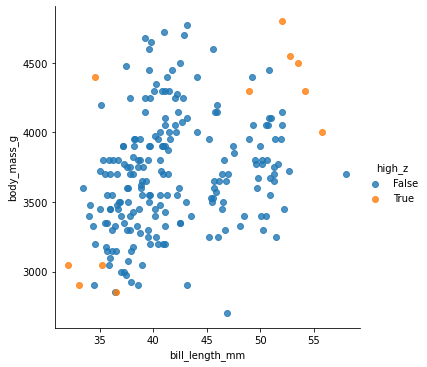

In [206]:
sns.lmplot('bill_length_mm', 'body_mass_g', data=res1, hue='high_z', fit_reg=False)

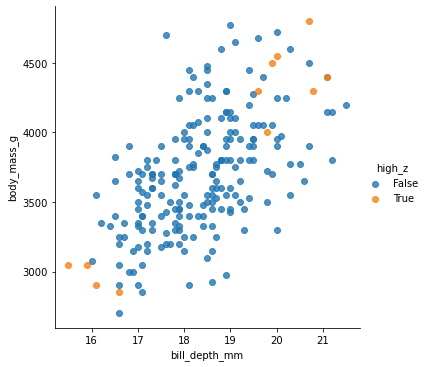

In [207]:
sns.lmplot('bill_depth_mm', 'body_mass_g', data=res1, hue='high_z', fit_reg=False)

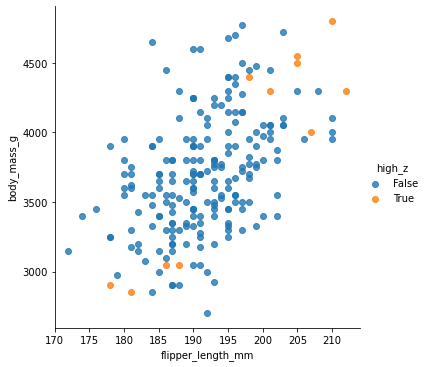

In [208]:
sns.lmplot('flipper_length_mm', 'body_mass_g', data=res1, hue='high_z', fit_reg=False)

In [190]:
z2 = np.absolute(((df2 - df2.mean(axis=0)) / df2.std(axis=0)))
(z2.sum(axis=1) / 4) > 1.4

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [191]:
res2 = pd.DataFrame(df2, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
res2['high_z'] = z2.sum(axis=1) / 4 > 1.4
res2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,high_z
0,46.1,13.2,211.0,4500.0,False
1,50.0,16.3,230.0,5700.0,False
2,48.7,14.1,210.0,4450.0,False
3,50.0,15.2,218.0,5700.0,False
4,47.6,14.5,215.0,5400.0,False


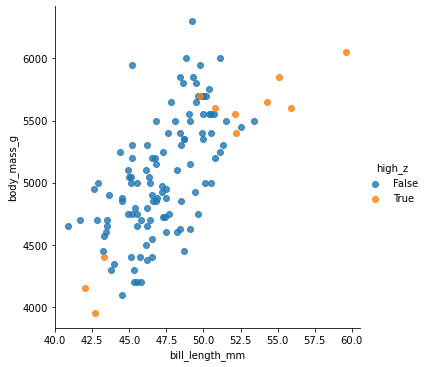

In [209]:
sns.lmplot('bill_length_mm', 'body_mass_g', data=res2, hue='high_z', fit_reg=False)

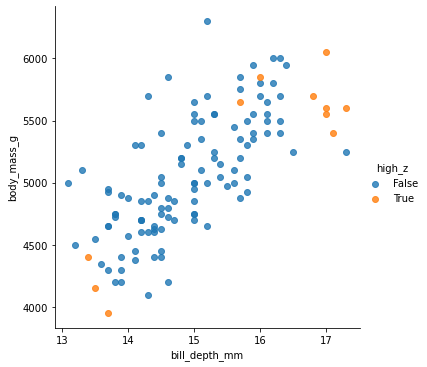

In [210]:
sns.lmplot('bill_depth_mm', 'body_mass_g', data=res2, hue='high_z', fit_reg=False)

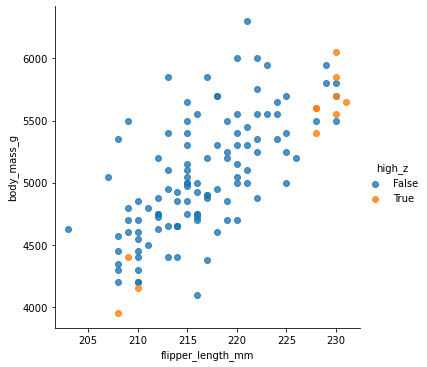

In [211]:
sns.lmplot('flipper_length_mm', 'body_mass_g', data=res2, hue='high_z', fit_reg=False)